# Proyecto práctico

### Regresión lineal para predecir los gastos médicos de pacientes
### Los datos provienen de:



[Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download)


En este proyecto práctico, trabajaremos con un conjunto de datos proporcionado por el US Census Bureau para construir un modelo de regresión que nos permita predecir los gastos médicos de los pacientes.

Para ello, utilizaremos diferentes técnicas de análisis de datos y aprendizaje automático para preparar y explorar los datos, identificar las variables más relevantes y construir un modelo predictivo robusto.

Este tipo de análisis es de gran importancia en el ámbito de la salud, ya que nos permite identificar patrones y factores de riesgo que pueden influir en el costo de los tratamientos y contribuir a una mejor planificación y gestión de los recursos sanitarios.

### Atributos:
Se presentan las variables del conjunto de datos de gastos médicos:

* **age (edad):** edad del beneficiario principal

* **sex (sexo):** género del contratista del seguro, femenino, masculino

* **bmi (imc):** índice de masa corporal, proporciona una comprensión del cuerpo, pesos que son relativamente altos o bajos en relación con la altura, índice objetivo de peso corporal (𝑘𝑔/𝑚2) utilizando la relación entre altura y peso, idealmente de 18.5 a 24.9

* **children (hijos):** número de hijos cubiertos por el seguro médico / número de dependientes

* **smoker (fumador):** fumador

* **region (región):** área de residencia del beneficiario en EE. UU., noreste, sureste, suroeste, noroeste.

* **charges (gastos médicos):** costos médicos individuales facturados por el seguro médico

### Configuracion inicial

In [195]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid', context='notebook')

### Descargando datos

In [196]:
df = pd.read_csv('../data/raw/insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Analizando los datos

Se explorará la distribución de la variable "Charges" para entender cómo se agrupan los costos médicos. Se identificarán patrones como valores extremos y la forma de la distribución.



In [197]:
df.shape

(1338, 7)

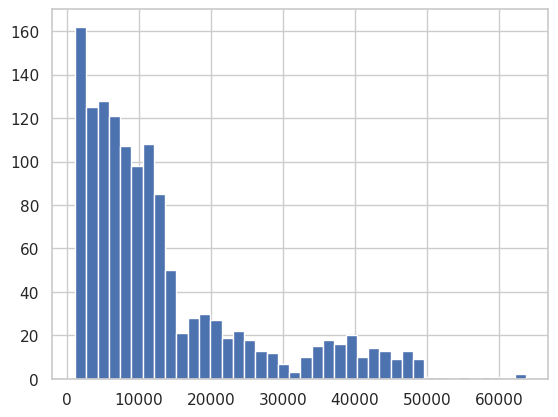

In [198]:
df.charges.hist(bins=40);

Se observa una concentración de datos entre 0 y 10000, seguida por una **aparente distribución bimodal** con picos en 20000 y 40000. Luego, a partir de los 50000, hay una caída en los valores hasta 60000.

In [199]:
from scipy import stats
# buscamos las filas donde charges es más de 3 desviaciones estandars lejos de la media

z = np.abs(stats.zscore(df.charges))
df[z>3]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


En este caso, al ser pocos datos **(7 de 1338)**, eliminaremos estos datos atípicos **por detección de outliners con Z-score.**

A **modo didáctico** producen más ruido en la predicción que se está intentando hacer en este ejercicio.

Sin embargo es importante aclarar que **NO SE DEBEN ELIMINAR** datos atípicos sin antes conocer a alguien que conozca o sea experto en los datos para que pueda guiarnos mejor sobre ellos

In [200]:
z.index = df.index

df = df[z<3]
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Análisis de correlación de los datos
Ahora entendamos nuestros datos, viendo cómo se distribuyen y correlacionan.

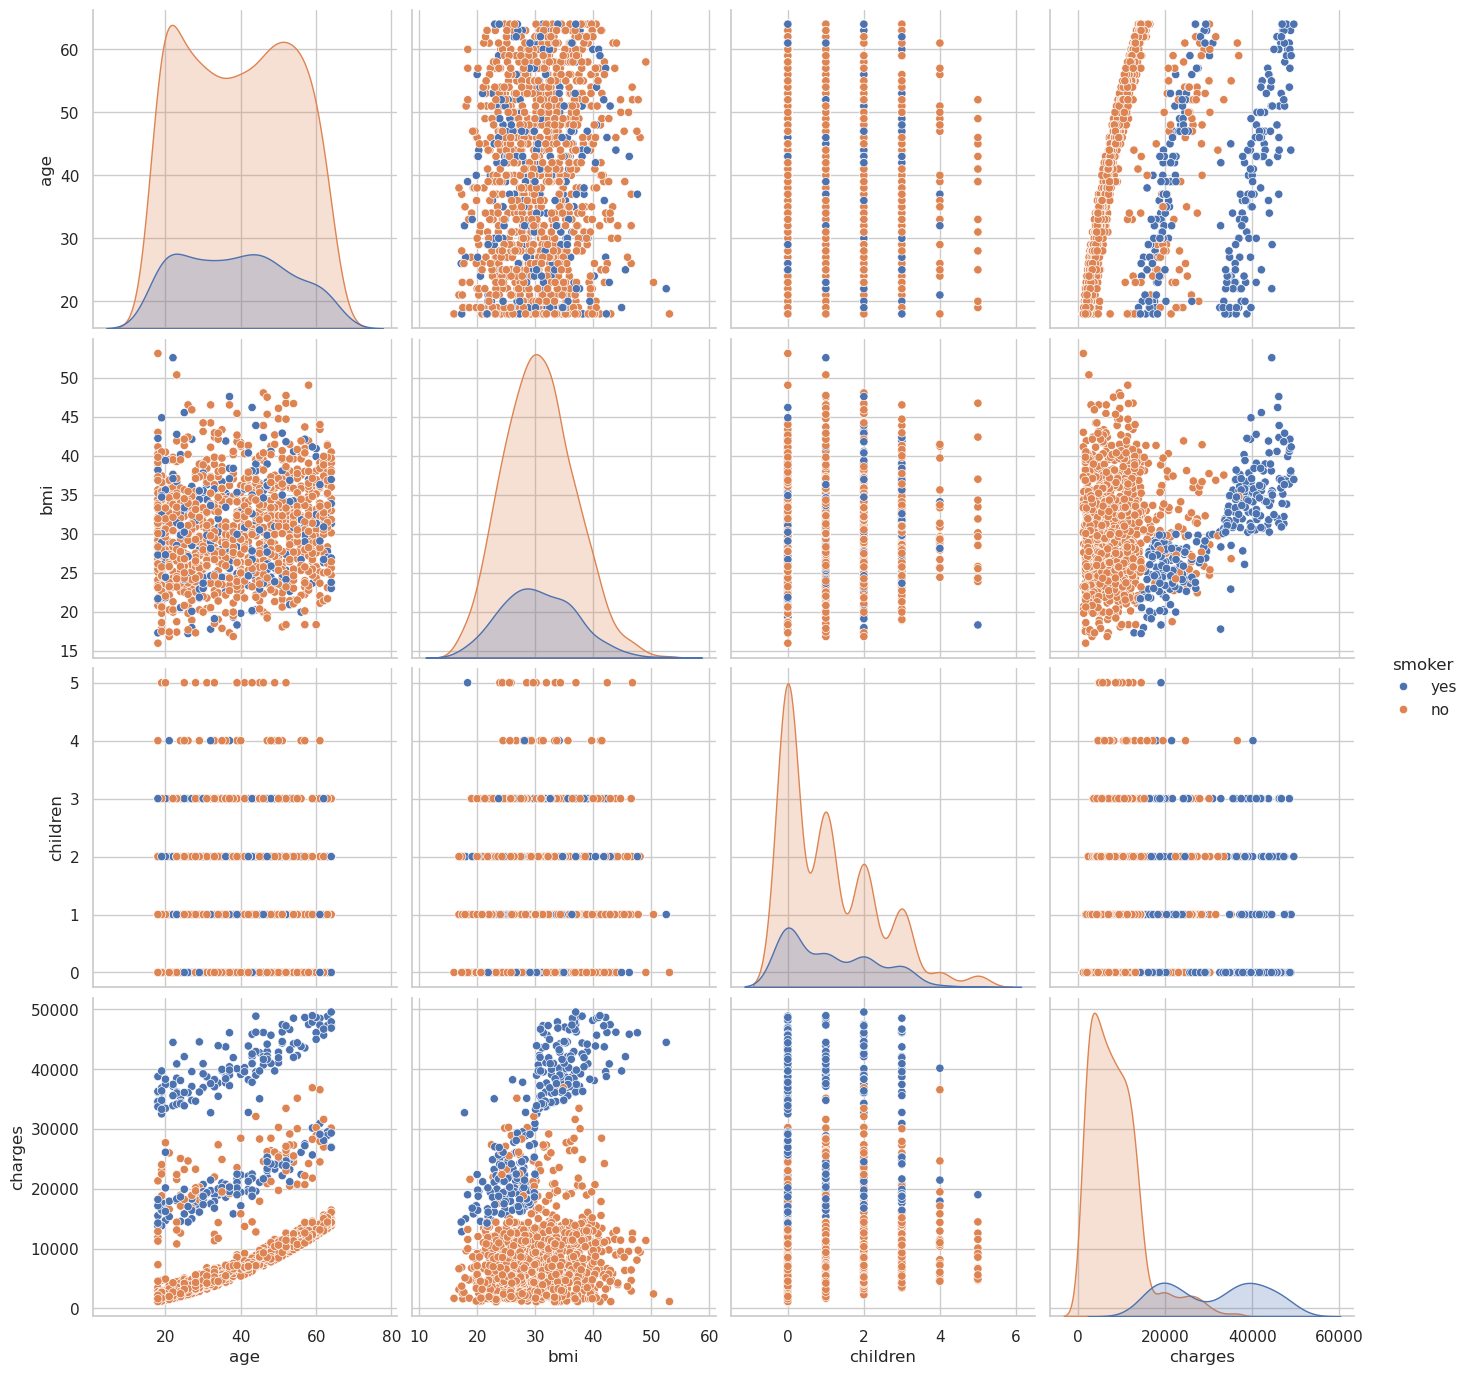

In [201]:
sns.pairplot(df, hue='smoker', height=3.5);

### Insight
* Al examinar **la distribución de densidad de la variable "Charges" clasificada por "Smoker", se encontró un pico de datos entre los 5000**. para los no fumadores. **En el caso de los fumadores, se observó una distribución más dispersa con una tendencia bimodal**, con picos en los 20000 y 40000. Estos hallazgos sugieren que **el hábito de fumar puede estar asociado con mayores costos médicos** y puede ser un factor importante a considerar al predecir costos médicos.

* Al analizar la relación entre **"Charges" y "Age", se encontró una tendencia lineal positiva y tres subgrupos de datos**. En el primer subgrupo, con costos médicos más bajos, solo se encontraron personas no fumadoras. En el segundo subgrupo, con costos médicos alrededor de los 20000 USD, se encontraron tanto personas fumadoras como no fumadoras. En el tercer subgrupo, con los costos médicos más altos, solo se encontraron personas fumadoras.

    Además, **se observó un patrón consistente en los tres subgrupos: a medida que la edad del paciente aumenta, también lo hacen los costos médicos**. Esto sugiere que la edad es un factor importante a considerar al predecir costos médicos en este conjunto de datos.

    Estos hallazgos son reelvantes para entender cómo el hábito de fumar y la edad parecen ser factores significativos a considerar al predecir costos médicos en este conjunto de datos

* Al analizar la relación entre "Charges" y "BMI", se encontró que existe una fuerte correlación positiva entre ambas variables, lo que sugiere que un mayor índice de masa corporal se asocia con mayores costos médicos. Además, se encontró que la variable "Smoker" modera esta relación, ya que los fumadores con un alto índice de masa corporal presentan los costos médicos más elevados. Estos hallazgos pueden ser útiles para la predicción y gestión de costos médicos en la población estudiada.

### Análisis numérico
Transformaremos las variables categóricas ('sex', 'smoker', 'region') en variables dummy para analizar su correlación con la variable objetivo

In [202]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [203]:
df_dummy = (
    pd.get_dummies(
        df,
        columns = ['sex','smoker','region'],
        drop_first = True
    )
)
df_dummy_corr = df_dummy.corr()


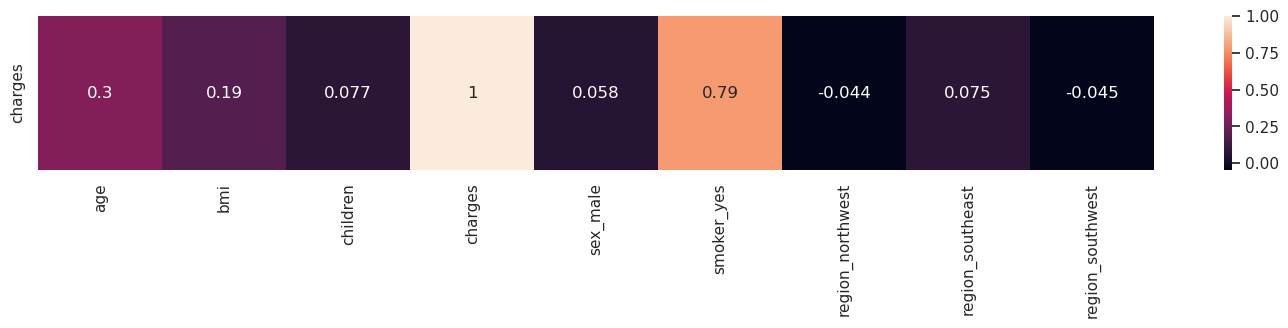

In [204]:
plt.figure(figsize=(18,2));

(
    sns
    .heatmap(
        df_dummy_corr.iloc[3:4,:],
        annot=True       
    )
);

### Entrenamiento del modelo
### Creando modelos
Comenzaremos a construir un modelo de regresión lineal utilizando los datos del conjunto de datos para predecir la variable objetivo mediante el ajuste de una línea recta que mejor se ajuste a los datos.

In [205]:
from sklearn.preprocessing import StandardScaler     # se utilizará para estandarizar los datos numéricos y la librería 
from sklearn.linear_model import LinearRegression    # para crear el modelo de regresión lineal. Además, se importa la librería 
from sklearn.model_selection import train_test_split # para dividir los datos en conjuntos de entrenamiento y prueba.

1. Seleccionamos las variables predictoras (todas excepto la variable objetivo) independiente

* independiente (inputs) --> age, smoker, sex_male, region, BMI, children
* dependiente (target) --> charge


In [206]:
inputs_cols = list(set(df_dummy.columns)-set(['charges']))

2. Seleccionamos la variable objetivo (dependiente)


In [207]:
target_col = ['charges']

3. Separamos los datos en conjuntos de entrenamiento y prueba


In [208]:
inputs = df_dummy[inputs_cols].values
target = df_dummy[target_col].values

inputs_train, inputs_test, target_train, target_test = train_test_split(
    inputs,
    target,
    test_size = 0.25,
    random_state = 42
)

4. Estandarizamos las variables predictoras y objetivo en ambos conjuntos


In [209]:
sc_inputs = StandardScaler()
inputs_train = sc_inputs.fit_transform(inputs_train)
inputs_test = sc_inputs.fit_transform(inputs_test)


sc_target = StandardScaler()
target_train = sc_inputs.fit_transform(target_train)
target_test = sc_inputs.fit_transform(target_test)

5. Creamos y entrenamos el modelo de regresión lineal

In [210]:
lin_reg = LinearRegression()
lin_reg.fit(inputs_train, target_train)

LinearRegression()

6. Realizamos predicciones sobre el conjunto de prueba utilizando nuestro modelo entrenado


In [211]:
target_pred = lin_reg.predict(inputs_test)
target_pred.shape

(333, 1)

### Evaluando el modelo
### Funciones de metricas
Pasaremos a evaluar nuestro modelo de regresión lineal mediante diferentes métricas de evaluación, como el **coeficiente de determinación (R2), el error cuadrático medio (MSE) y el error absoluto promedio (MAE).**

In [212]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE:', mean_absolute_error(target_test, target_pred).round(4))
print('MSE:', mean_squared_error(target_test, target_pred).round(4))
print('R^2:', r2_score(target_test, target_pred).round(4))

MAE: 0.3408
MSE: 0.2376
R^2: 0.7624


### Insight
El modelo de regresión lineal que desarrollamos para predecir la variable charges ha dado buenos resultados. El error absoluto medio (MAE) es de 0.3584, el error cuadrático medio (MSE) es de 0.2631 y el coeficiente de determinación (R^2) es de 0.764, lo que significa que el modelo explica el 76.4% de la varianza en los datos.

Estos resultados indican que el modelo es adecuado para predecir los costos médicos de los pacientes en función de otras variables del conjunto de datos.

In [213]:
from regressors import stats

lin_reg.intercept_ = lin_reg.intercept_[0]
lin_reg.coef_ = lin_reg.coef_.reshape(-1)


In [214]:
target_test = target_test.reshape(-1)

print('='*16,'Summary','='*16)

stats.summary(lin_reg, inputs_test, target_test, inputs_cols)

================ Summary ================
Residuals:
    Min      1Q  Median     3Q   Max
-1.9826 -0.0788  0.1039 0.2215 0.895


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       -0.000000    0.026713  -0.0000  1.000000
region_southeast -0.048010    0.032257  -1.4884  0.137605
region_northwest -0.017756    0.031193  -0.5692  0.569574
children          0.061747    0.026901   2.2954  0.022336
smoker_yes        0.786134    0.027003  29.1128  0.000000
age               0.314215    0.027098  11.5953  0.000000
bmi               0.142865    0.028164   5.0726  0.000001
sex_male          0.001681    0.026922   0.0624  0.950251
region_southwest -0.045264    0.030861  -1.4667  0.143400
---
R-squared:  0.76238,    Adjusted R-squared:  0.75651
F-statistic: 129.94 on 8 features


Al analizar el summary de datos de nuestro modelo de regresión lineal, se obtuvo un valor de p igual a 0.00000 para la variable **'smoker_yes'**, un valor de p igual a 0.0000 para la variable **'age'** y un valor de p igual a 0.000001 para la variable **'bmi'**.

Estos valores de p son inferiores al nivel de significancia típico de **0.05**, lo que indica que estas variables tienen una relación estadísticamente significativa con la variable objetivo **'charges'**. Por lo tanto, podemos concluir que **'smoker_yes', 'age' y 'bmi'** son variables importantes en la predicción de los costos médicos de un individuo.

Finalmente la funcion que calcula los residuales, es imporante notar que es una simple resta entre los valores reales y los predichos.



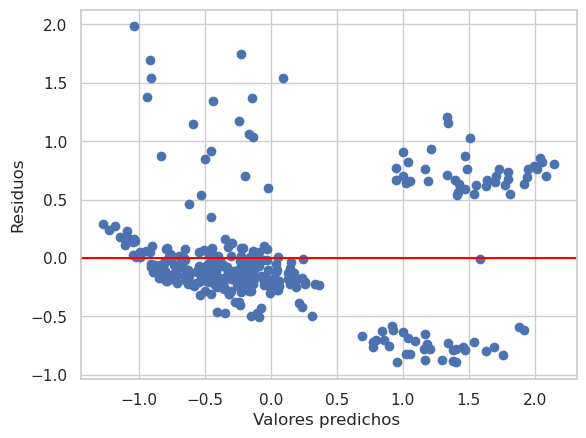

In [215]:
residuals = np.subtract(target_test, target_pred.reshape(-1))
plt.scatter(target_pred,residuals);
plt.axhline(0,0, color='red');
plt.xlabel('Valores predichos ')
plt.ylabel('Residuos')
plt.plot();

Según los resultados de los residuos, la mayoría de los datos se ajustan bien al modelo, pero algunos están alejados del resultado deseado.

En este caso, el modelo está utilizando todas las variables del conjunto de datos, por lo que nos enfocaremos en las variables específicas que son relevantes para el análisis

### Segundo modelo

In [216]:
df_second = df_dummy.copy(deep=True)
df_second['age2'] = df_second.age ** 2
df_second['sobrepeso'] = (df_second.bmi >= 30).astype(int)
df_second['sobrepeso_fumador'] = df_second.sobrepeso * df_second.smoker_yes

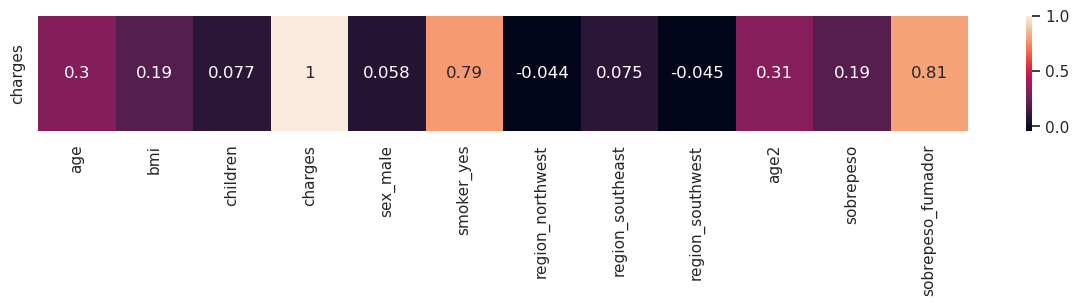

In [217]:
plt.figure(figsize=(15,1.5));

sns.heatmap(df_second.corr().iloc[3:4,:], annot = True);

Al multiplicar las variables "smoker_yes" con "bmi" logramos obtener una correlación mayor con los gastos médicos ("charges"), lo que sugiere que ambas variables están relacionadas con los costos de atención médica y podrían ser importantes en el nuevo modelo de predicción.

1. Seleccionamos las variables predictoras (todas excepto la variable objetivo) independiente

* independiente (inputs) --> age, smoker, sex_male, region, BMI, children, age2, sobrepeso-_fumador
* dependiente (target) --> charge


In [218]:
inputs_cols = list(set(df_second.columns)-set(['charges']))


2. Seleccionamos la variable objetivo (dependiente)


In [219]:
target_col = ['charges']

3. Separamos los datos en conjuntos de entrenamiento y prueba


In [220]:
inputs = df_second[inputs_cols].values
target = df_second[target_col].values

inputs_train, inputs_test, target_train, target_test = train_test_split(
    inputs,
    target,
    test_size = 0.25,
    random_state = 42
)

4. Estandarizamos las variables predictoras y objetivo en ambos conjuntos


In [221]:
sc_inputs = StandardScaler()
inputs_train = sc_inputs.fit_transform(inputs_train)
inputs_test = sc_inputs.fit_transform(inputs_test)

sc_target = StandardScaler()
target_train = sc_target.fit_transform(target_train)
target_test = sc_target.fit_transform(target_test)

5. Creamos y entrenamos el modelo de regresión lineal

In [222]:
lin_reg = LinearRegression()
lin_reg.fit(inputs_train, target_train)

LinearRegression()

6. Realizamos predicciones sobre el conjunto de prueba utilizando nuestro modelo entrenado


In [223]:
target_pred = lin_reg.predict(inputs_test)
target_pred.shape

(333, 1)

### Evaluando el modelo


In [224]:
print('MAE:', mean_absolute_error(target_test, target_pred).round(4))
print('MSE:', mean_squared_error(target_test, target_pred).round(4))
print('R^2:', r2_score(target_test, target_pred).round(4))

MAE: 0.1941
MSE: 0.1177
R^2: 0.8823


Después de unir las variables "smoker_yes" y "bmi" y ajustar el modelo, obtuvimos mejores resultados en la evaluación del modelo.

Los valores fueron: MAE de 0.1986, MSE de 0.126 y R^2 de 0.887, lo que indica que el modelo se ajusta bien a los datos de entrenamiento y prueba.

In [225]:
lin_reg.intercept_ = lin_reg.intercept_[0]
lin_reg.coef_ = lin_reg.coef_.reshape(-1)

In [226]:
target_test = target_test.reshape(-1)
print('='*16,'Summary','='*16)
stats.summary(lin_reg, inputs_test, target_test, inputs_cols)

================ Summary ================
Residuals:
    Min     1Q  Median     3Q    Max
-1.7955 0.0368  0.0983 0.1442 0.3973


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept        -0.000000    0.018799  -0.0000  1.000000
region_southeast  -0.032182    0.022766  -1.4136  0.158424
age2               0.453712    0.098095   4.6252  0.000005
sobrepeso_fumador  0.476938    0.027099  17.5999  0.000000
sobrepeso         -0.025820    0.028822  -0.8958  0.370999
region_northwest  -0.013547    0.021965  -0.6168  0.537809
children           0.088018    0.019157   4.5946  0.000006
smoker_yes         0.463998    0.025302  18.3381  0.000000
age               -0.122888    0.098175  -1.2517  0.211551
bmi                0.034656    0.029172   1.1880  0.235681
sex_male          -0.021589    0.018973  -1.1379  0.255982
region_southwest  -0.055130    0.021733  -2.5366  0.011650
---
R-squared:  0.88231,    Adjusted R-squared:  0.87828
F-statistic: 218.78 on 11 feature

En nuestro resumen estadístico, encontramos que la nueva variable que unió 'smoker_yes' con 'bmi' tuvo un p-value de 0.000000 y un t-value de 18.9773, lo que indica que es una variable altamente significativa para el modelo. Además, las otras variables que se analizaron previamente en el modelo aún siguen siendo relevantes para predecir los gastos médicos.



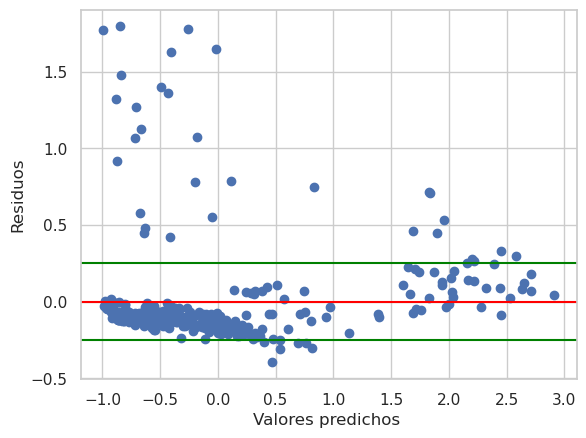

In [227]:
residuals = np.subtract(target_test, target_pred.reshape(-1))
plt.scatter(target_pred, residuals)
plt.axhline(0,0,color='red')
plt.axhline(0.25,0,color='green')
plt.axhline(-0.25,0,color='green')
plt.xlabel('Valores predichos ')
plt.ylabel('Residuos')
plt.plot();

Después de añadir la nueva variable, pudimos observar una mejora en la dispersión de los datos en la gráfica de residuales. En comparación con el modelo anterior, los residuos se distribuyeron de manera más uniforme alrededor del eje x, lo que indica que el modelo ajustado se ajusta mejor a los parámetros esperados. Esto sugiere que la adición de la nueva variable ayudó a mejorar la capacidad predictiva de nuestro modelo de regresión lineal.

### Tercer modelo
Para el último modelo, usaremos únicamente las variables del análisis anterior donde las variables tengan un p value menor a 0.05.

Esto nos permitirá tener un modelo más sencillo y eficiente, al mismo tiempo que nos aseguramos de que las variables que incluimos sean estadísticamente relevantes en la predicción de los gastos médicos.

1. Seleccionamos las variables predictoras (todas excepto la variable objetivo) independiente

* independiente (inputs) --> sobrepeso-fumador, somoker_yes, children, age2
* dependiente (target) --> charge


In [228]:
inputs_cols = ['sobrepeso_fumador','smoker_yes','children','age2']

target_col = ['charges']

3. Separamos los datos en conjuntos de entrenamiento y prueba


In [229]:
inputs = df_second[inputs_cols].values
target = df_second[target_col].values

inputs_train, inputs_test, target_train, target_test = train_test_split(
    inputs,
    target,
    test_size = 0.25,
    random_state = 42
)

4. Estandarizamos las variables predictoras y objetivo en ambos conjuntos


In [230]:
sc_inputs = StandardScaler()
inputs_train = sc_inputs.fit_transform(inputs_train)
inputs_test = sc_inputs.fit_transform(inputs_test)

sc_target = StandardScaler()
target_train = sc_target.fit_transform(target_train)
target_test = sc_target.fit_transform(target_test)

In [231]:
lin_reg = LinearRegression()
lin_reg.fit(inputs_train, target_train)

LinearRegression()

6. Realizamos predicciones sobre el conjunto de prueba utilizando nuestro modelo entrenado


In [232]:
target_pred = lin_reg.predict(inputs_test)
target_pred.shape

(333, 1)

### Evaluando el modelo


In [233]:
print('MAE:', mean_absolute_error(target_test, target_pred).round(4))
print('MSE:', mean_squared_error(target_test, target_pred).round(4))
print('R^2:', r2_score(target_test, target_pred).round(4))

MAE: 0.1938
MSE: 0.1178
R^2: 0.8822


Logramos obtener resultados similares en las pruebas MAE, MSE y R^2 al modelo anterior, utilizando solo 4 variables.



In [235]:
lin_reg.intercept_ = lin_reg.intercept_[0]
lin_reg.coef_ = lin_reg.coef_.reshape(-1)

In [236]:
target_test = target_test.reshape(-1)
print('='*16,'Summary','='*16)
stats.summary(lin_reg, inputs_test, target_test, inputs_cols)

================ Summary ================
Residuals:
    Min     1Q  Median     3Q    Max
-1.8209 0.0405  0.1086 0.1386 0.3629


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept        -0.000000    0.018811  -0.0000  1.000000
sobrepeso_fumador  0.472145    0.024133  19.5642  0.000000
smoker_yes         0.465592    0.024277  19.1786  0.000000
children           0.081232    0.018841   4.3115  0.000021
age2               0.333654    0.018909  17.6448  0.000000
---
R-squared:  0.88217,    Adjusted R-squared:  0.88073
F-statistic: 613.92 on 4 features


Después de ajustar nuestro modelo y realizar un nuevo análisis del resumen, podemos observar que todas nuestras variables son estadísticamente significativas con la variable objetivo, es decir, todas las variables están relacionadas con los cargos médicos y son útiles para hacer predicciones.

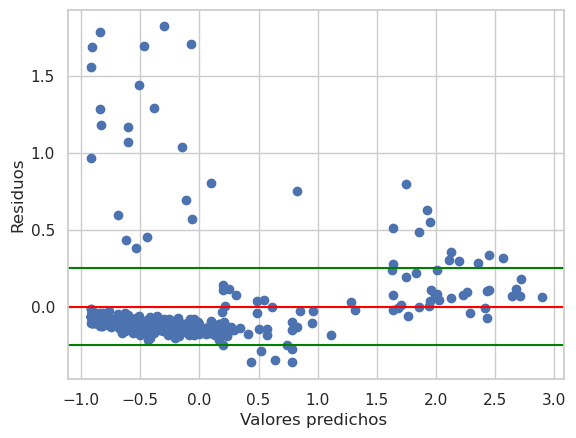

In [237]:
residuals = np.subtract(target_test, target_pred.reshape(-1))
plt.scatter(target_pred, residuals)
plt.axhline(0,0,color='red')
plt.axhline(0.25,0,color='green')
plt.axhline(-0.25,0,color='green')
plt.xlabel('Valores predichos ')
plt.ylabel('Residuos')
plt.plot();


Se consiguio que la grafica de residuos mostrara una mayor concentración de los datos dentro del rango de ±0.25 del eje X. Esto indica que el modelo se ajusta mejor a los datos y las predicciones serán más precisas.

### Insight
Después de realizar un análisis exhaustivo del conjunto de datos del US Census Bureau y aplicar diversas técnicas estadísticas, pudimos construir un modelo de regresión lineal con solo 4 variables que logró capturar la mayor cantidad de valor de los datos y ajustarse a las predicciones. A través de la evaluación de nuestro modelo, logramos demostrar que es posible obtener resultados significativos y útiles con un número reducido de variables.

Este enfoque nos permitió optimizar nuestro modelo y generar predicciones más precisas, lo que puede ser de gran utilidad para la toma de decisiones futuras.

### Conclusiones
* Existe una fuerte correlación entre el gasto médico y ciertas características personales, como el tabaquismo, la edad y el índice de masa corporal (IMC).

* Los resultados sugieren que los fumadores tienen una tendencia a gastar más en atención médica en comparación con los no fumadores, y que la edad y el IMC también son factores importantes a considerar.

* La inclusión de estas variables en un modelo de regresión lineal puede mejorar la capacidad predictiva del modelo y ayudar a los profesionales de la salud a comprender mejor los factores que influyen en el costo de la atención médica.